## Assignement 2 - Heart Disease Prediction

### Student Name : Ramya Chandran
### Student Number : 8895789


* 1.Consider the heart disease dataset in pandas dataframe 
* 2.Remove outliers using mean,median,Z score. 
* 3.Convert text columns to numbers using label encoding and one hot encoding 
* 4.Apply scaling 
* 5.Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the oerformance 
* 6.Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance 
* 7.Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score, confusion_matrix

In [30]:
# Loading the dataset
dia_data = pd.read_csv('/Users/ramyachandran/Documents/AI_Algo/CSCN8000-lab-submissions/practical_labs/heart.csv')
dia_data.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [31]:
# Get more details about the dataset
print(dia_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [32]:
# Checking for Missing Values
dia_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [33]:
# Checking for and dropping duplicates
(dia_data.drop_duplicates()).shape

(918, 12)

In [34]:
print(dia_data.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR   
count  918.000000  918.000000   918.000000  918.000000  918.000000  \
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


2.Remove outliers using mean,median,Z score. 

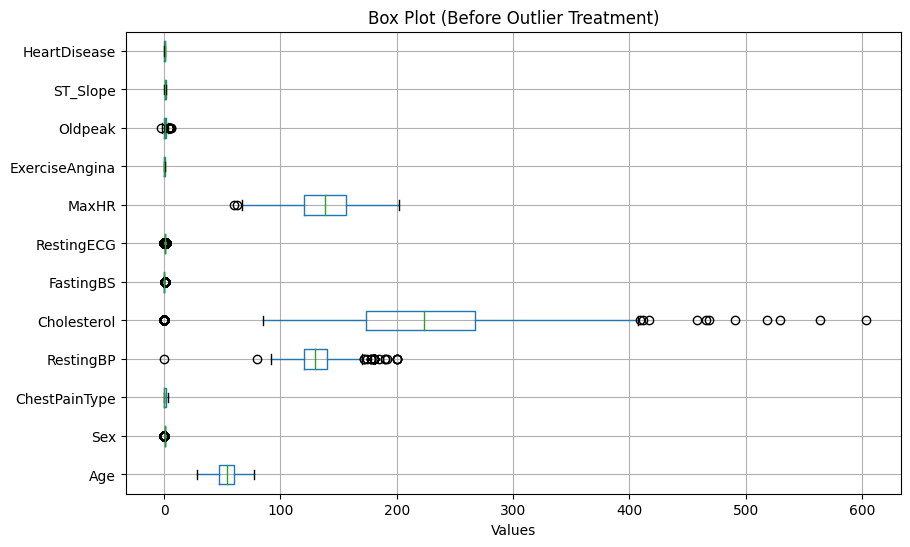

In [45]:
# Box plot before outlier treatment
plt.figure(figsize=(10, 6))
dia_data.boxplot(column=list(df.columns), vert=False)
plt.title("Box Plot (Before Outlier Treatment)")
plt.xlabel("Values")
plt.show()

In [35]:
# Columns for which outliers need to be removed (numerical columns only)
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Function to remove outliers using mean
def remove_outliers_mean(dia_data, columns):
    for column in columns:
        mean = dia_data[column].mean()
        std = dia_data[column].std()
        dia_data = dia_data[(dia_data[column] > mean - 3 * std) & (dia_data[column] < mean + 3 * std)]
    return dia_data

# Function to remove outliers using median
def remove_outliers_median(dia_data, columns):
    for column in columns:
        median = dia_data[column].median()
        q1 = dia_data[column].quantile(0.25)
        q3 = dia_data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        dia_data = dia_data[(dia_data[column] > lower_bound) & (dia_data[column] < upper_bound)]
    return dia_data

# Function to remove outliers using Z-score
def remove_outliers_zscore(dia_data, columns, threshold=3):
    for column in columns:
        z_scores = (dia_data[column] - dia_data[column].mean()) / dia_data[column].std()
        dia_data = dia_data[abs(z_scores) < threshold]
    return dia_data

# Remove outliers using different methods
df_mean = remove_outliers_mean(dia_data, numerical_columns)
df_median = remove_outliers_median(dia_data, numerical_columns)
df_zscore = remove_outliers_zscore(dia_data, numerical_columns)

# Let's check the shape of the dataframes after removing outliers using different methods
print("Original Shape:", dia_data.shape)
print("Shape after mean method:", df_mean.shape)
print("Shape after median method:", df_median.shape)
print("Shape after Z-score method:", df_zscore.shape)

Original Shape: (918, 12)
Shape after mean method: (899, 12)
Shape after median method: (690, 12)
Shape after Z-score method: (899, 12)


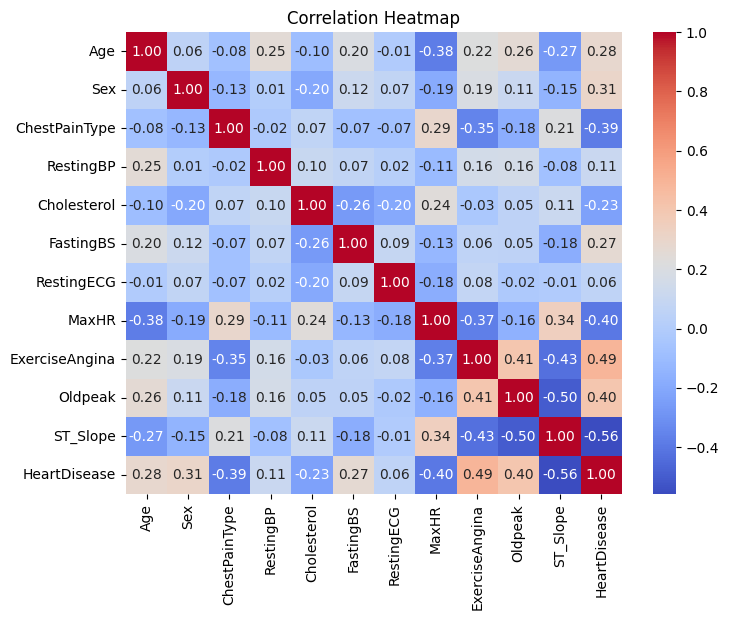

In [46]:
# Compute correlation matrix
correlation_matrix = dia_data.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

3.Convert text columns to numbers using label encoding and one hot encoding 

In [39]:
# Text columns for encoding
text_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

# Label encoding
for column in text_columns:
    dia_data[column] = dia_data[column].astype('category').cat.codes

# One-hot encoding
df_encoded = pd.get_dummies(dia_data, columns=text_columns)

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(df_encoded.head(3))

Encoded DataFrame:
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease   
0   40        140          289          0    172      0.0             0  \
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   

   Sex_0  Sex_1  ChestPainType_0  ...  ChestPainType_2  ChestPainType_3   
0  False   True            False  ...            False            False  \
1   True  False            False  ...             True            False   
2  False   True            False  ...            False            False   

   RestingECG_0  RestingECG_1  RestingECG_2  ExerciseAngina_0   
0         False          True         False              True  \
1         False          True         False              True   
2         False         False          True              True   

   ExerciseAngina_1  ST_Slope_0  ST_Slope_1  ST_Slope_2  
0             False       False       False        True  
1 

4.Apply scaling 

In [40]:
# Numerical columns for scaling
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_encoded[numerical_columns] = min_max_scaler.fit_transform(df_encoded[numerical_columns])

# Standardization
standard_scaler = StandardScaler()
df_encoded[numerical_columns] = standard_scaler.fit_transform(df_encoded[numerical_columns])

# Display the scaled DataFrame
print("Scaled DataFrame:")
print(df_encoded.head(3))

Scaled DataFrame:
        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak   
0 -1.433140   0.410909     0.825070          0  1.382928 -0.832432  \
1 -0.478484   1.491752    -0.171961          0  0.754157  0.105664   
2 -1.751359  -0.129513     0.770188          0 -1.525138 -0.832432   

   HeartDisease  Sex_0  Sex_1  ChestPainType_0  ...  ChestPainType_2   
0             0  False   True            False  ...            False  \
1             1   True  False            False  ...             True   
2             0  False   True            False  ...            False   

   ChestPainType_3  RestingECG_0  RestingECG_1  RestingECG_2   
0            False         False          True         False  \
1            False         False          True         False   
2            False         False         False          True   

   ExerciseAngina_0  ExerciseAngina_1  ST_Slope_0  ST_Slope_1  ST_Slope_2  
0              True             False       False       False        True  
1  

5.Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the oerformance 

In [41]:
# Separate features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standalone SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Standalone SVM Accuracy:", accuracy_svm)

# Bagging model using SVM
bagging_model = BaggingClassifier(base_estimator=SVC(kernel='linear'), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging SVM Accuracy:", accuracy_bagging)

Standalone SVM Accuracy: 0.8532608695652174
Bagging SVM Accuracy: 0.8478260869565217


/Users/ramyachandran/anaconda3/envs/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


6.Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance 

In [42]:

# Standalone Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Standalone Decision Tree Accuracy:", accuracy_dt)

# Bagging model using Decision Tree
bagging_model_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_model_dt.fit(X_train, y_train)
y_pred_bagging_dt = bagging_model_dt.predict(X_test)
accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)
print("Bagging Decision Tree Accuracy:", accuracy_bagging_dt)

Standalone Decision Tree Accuracy: 0.7989130434782609
Bagging Decision Tree Accuracy: 0.8586956521739131


/Users/ramyachandran/anaconda3/envs/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


7.Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

In [43]:
print("Standalone SVM Accuracy:", accuracy_svm)
print("Bagging SVM Accuracy:", accuracy_bagging)
print("Standalone Decision Tree Accuracy:", accuracy_dt)
print("Bagging Decision Tree Accuracy:", accuracy_bagging_dt)

Standalone SVM Accuracy: 0.8532608695652174
Bagging SVM Accuracy: 0.8478260869565217
Standalone Decision Tree Accuracy: 0.7989130434782609
Bagging Decision Tree Accuracy: 0.8586956521739131


SVM (Support Vector Machine) is effective for linear and non-linear data with less interpretability. Here it gives out an accuracy of about 85.32%

SVM Bagging uses multiple SVM classifiers for improved accuracy and generalization on complex datasets, trading interpretability for performance. But in this case it has reduced the accuracy to 84.78%

Decision Tree is interpretable, better for understanding decisions, but may overfit. Here it has achieved the accuracy of 79.89%

Decision Tree Bagging uses an ensemble of Decision Trees to reduce overfitting, improve accuracy, and handle complex datasets at the cost of interpretability. Here it achieves the best accuracy of 85.86%

Overall decision tree with bagging performs the best among the given models over the specified Heart disease prediction database.
